<a href="https://colab.research.google.com/github/Andreaierardi/SocialNetworkAnalysis-project/blob/main/project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Social Network Analysis Project

### Università degli Studi di Milano 



---



In [ ]:
# Nodes 
# https://github.com/Andreaierardi/SocialNetworkAnalysis-project/blob/main/dataset/fb-pages-food.csv

# Edges
# https://github.com/Andreaierardi/SocialNetworkAnalysis-project/blob/main/dataset/fb-pages-food.edges

In [6]:
import pandas as pd
nodes = pd.read_csv('https://raw.githubusercontent.com/Andreaierardi/SocialNetworkAnalysis-project/main/dataset/fb-pages-food.csv?token=AIWS4RS5NQFGQ4V7AK4BDR27Y7LXU',sep=";")

edges = pd.read_csv('https://raw.githubusercontent.com/Andreaierardi/SocialNetworkAnalysis-project/main/dataset/fb-pages-food.edges?token=AIWS4RQB3NJHZ4HKBI4NADC7Y7L2I')


In [7]:
print(nodes)
print(edges)

                        name   id
0                 Josh Marks  386
1    Blue Ribbon Restaurants  473
2                  Pat Neely    1
3                 La Griglia  542
4                Jose Garces  189
..                       ...  ...
615               Jumia Food  163
616              Luke Thomas  381
617          Clodagh McKenna  140
618  Chef Michelle Bernstein  157
619               SORTEDfood  114

[620 rows x 2 columns]
      source  target
0          0     276
1          0      58
2          0     132
3          0     603
4          0     398
...      ...     ...
2097     597     611
2098     601     603
2099     601     616
2100     603     616
2101     311     613

[2102 rows x 2 columns]


In [8]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
g = nx.Graph()

for e in edges.values.tolist():
  g.add_edge(e[0],e[1])

In [20]:
print('Number of nodes: {} - Number of links:{}'.format(g.order(),g.size()))


Number of nodes: 620 - Number of links:2102


In [26]:
density = nx.density(g)
print('Density: {}'.format(density))

Density: 0.0109541925061233


## Degree Analysis

In [27]:
degree = list(dict(g.degree()).values())


In [28]:
print('Standard deviation: {}'.format(np.std(degree)))
print('Median: {}'.format(np.median(degree)))
print('Min: {}'.format(np.min(degree)))
print('Max: {}'.format(np.max(degree)))

Standard deviation: 9.46914920573866
Median: 4.0
Min: 1
Max: 134


Text(0, 0.5, 'ECDF Food')

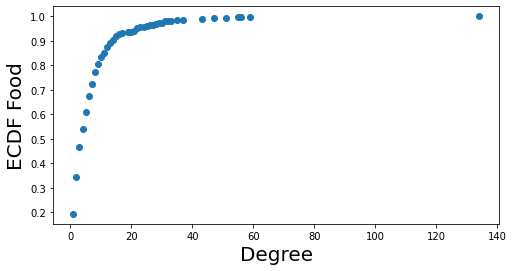

In [30]:

# ECDF linear scale
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.plot(x,y,marker='o',ms=6, linestyle='None')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECDF Food', size = 20)

Text(0, 0.5, 'ECDF Food')

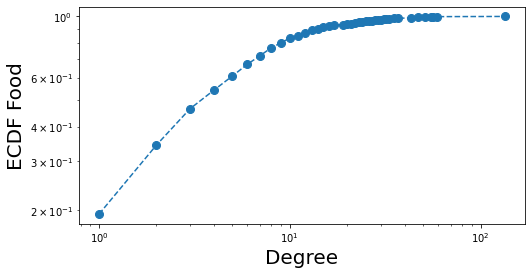

In [32]:

# ECDF loglog scale
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.loglog(x,y,marker='o',ms=8, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECDF Food', size = 20)


Text(0, 0.5, 'ECCDF FOOD')

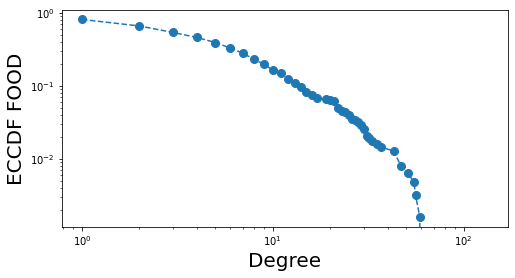

In [33]:
# ECCDF
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF FOOD', size = 20)

In [35]:
p = density
random_graph = nx.fast_gnp_random_graph(g.order(),p)


In [36]:
print('Number of nodes: {}'.format(random_graph.order()))
print('Number of links: {}'.format(random_graph.size()))

Number of nodes: 620
Number of links: 2056


In [37]:
random_degree = list(dict(random_graph.degree()).values())


Text(0, 0.5, 'ECCDF')

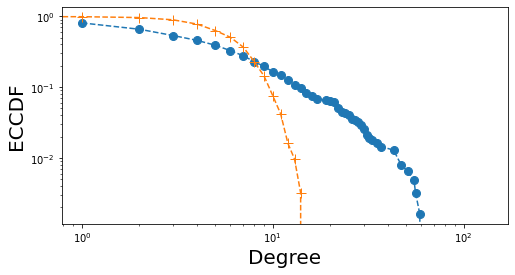

In [38]:
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)

cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)

fig_cdf_fb = plt.figure(figsize=(8,4))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--')
axes.loglog(x_random,1-y_random,marker='+',ms=10, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)

## HUBS

In [39]:
percentile_99 = np.percentile(degree,99)
print(percentile_99)

47.0


In [40]:
hub_nodi = [k for k,v in dict(g.degree()).items() if v>= percentile_99]


In [41]:
print(len(hub_nodi))
print(list(hub_nodi))

8
[265, 611, 90, 518, 340, 56, 67, 70]


In [43]:
print(list(nx.isolates(g)))


[]


## Connectivity

In [45]:
print(nx.is_connected(g))
print(nx.number_connected_components(g))

True
1


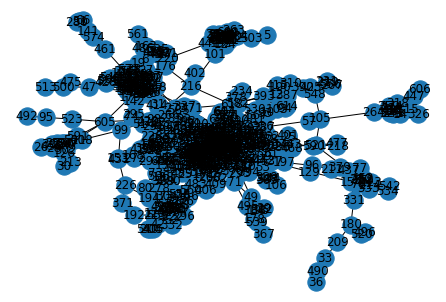

In [48]:
nx.draw(g,with_labels=True)
